**Load DataSet**

In [3]:
# https://www.kaggle.com/datasets/volodymyrgavrysh/heart-disease
import pandas as pd
data = pd.read_csv("/content/heart.csv")
len(data.columns)
data = data.drop_duplicates()
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
1,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
3,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# categorical_cols = ['sex','dataset','cp','fbs','restecg','exang','slope','thal']

# le = LabelEncoder()

# for col in categorical_cols:
#     data[col] = le.fit_transform(data[col])

# data.head()

**Separating Features and Target Variable**

In [4]:
X = data.drop(columns=['target'])
Y = data['target']


**Splitting Data into Training and Testing Set**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, shuffle=True
)


In [6]:
import numpy as np

X_testdata = X_test.to_numpy()


X_features = X_train.to_numpy()

mean = X_features.mean(axis=0)
std = X_features.std(axis=0)

X_features = (X_features - mean) / std
X_testdata = (X_testdata - mean) / std



Y_test_ground = y_test.to_numpy().reshape(-1,1)
print(X_testdata.shape, Y_test_ground.shape)

Y_ground = y_train.to_numpy().reshape(-1,1)
print(X_features.shape, Y_ground.shape)

(61, 13) (61, 1)
(241, 13) (241, 1)


In [ ]:
# import numpy as np

# X_features = X_train.to_numpy()
# X_features = (X_features - X_features.mean(axis=0)) / X_features.std(axis=0)

# Y_ground = y_train.to_numpy().reshape(-1,1)
# print(X_features.shape, Y_ground.shape)


(241, 13) (241, 1)


**Weights Assignment with Randomization**

In [7]:
weights = np.random.randn(X_features.shape[1],1) * 0.1

b = 0.01
weights.shape


(13, 1)

Calculating Z = Xt * W + b
  

In [ ]:
# mat_mul = np.dot(X_features,weights)

# z = mat_mul + b

(241, 1)
(241, 1)


**Applying Activation Function**

In [ ]:
# # Applying Matrix Multiplication
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# a = sigmoid(z)



Derivative of Cost Function w.r.t Weights (W)
J(w) = [ylogy^ + (1-y) log(1-y^)]
dJ / dw = bold text
which is derived as (a-y)X

In [ ]:

# loss =  (a-Y_ground)
# gradient = np.dot(X_features.T,loss)

(13, 1)
(241, 1)


Updating weights

In [ ]:
# learning_rate = .01
# weights = weights- learning_rate*gradient
# weights.shape

(13, 1)

**Function for Feed Forward Propagation and Back Propagation NN**

In [24]:
num_epochs = 1000
learning_rate = .01
loss_vector = []
val_loss_vector = []
b = 0.01
# Applying Matrix Multiplication
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def cal_Z():
  mat_mul = np.dot(X_features,weights)
  return mat_mul + b
def update_weights ():
  global  weights
  weights = weights- learning_rate*calcGradients()

def activation(z):
  return sigmoid(z)

def calcGradients():
  global b
  z = cal_Z()
  a = activation(z)
  loss =  (a-Y_ground)
  b -= learning_rate *( np.sum(loss) /X_features.shape[0] )

  gradient = np.dot(X_features.T,loss)
  gradient = gradient/X_features.shape[0]


    # Binary Cross-Entropy Loss (scalar per epoch)
  eps = 1e-8  # to avoid log(0)
  bce_loss = -np.mean(Y_ground*np.log(a + eps) + (1 - Y_ground)*np.log(1 - a + eps))
  loss_vector.append(bce_loss)



  return gradient

for epoch in range(num_epochs):
  update_weights()
  z_test = np.dot(X_testdata, weights) + b
  y_pred = sigmoid(z_test)
  eps = 1e-8
  val_loss = -np.mean(Y_test_ground * np.log(y_pred + eps) + (1 - Y_test_ground) * np.log(1 - y_pred + eps))
  val_loss_vector.append(val_loss)



**Applying Forward Pass on Test data**

In [25]:




  z_test = np.dot(X_testdata, weights) + b
  y_pred = sigmoid(z_test)


  #  Let be there a threshhold for 1 or 0 class classification
  threshold = 0.7

  # Apply threshold to complete it as a 0 or 1 for Binary Classification
  y_pred_class = (y_pred >= threshold).astype(int)


  # Calculate Accuracy Score
  accuracy = np.mean(y_pred_class == Y_test_ground)
  print("Test Accuracy:", accuracy)


Test Accuracy: 0.819672131147541


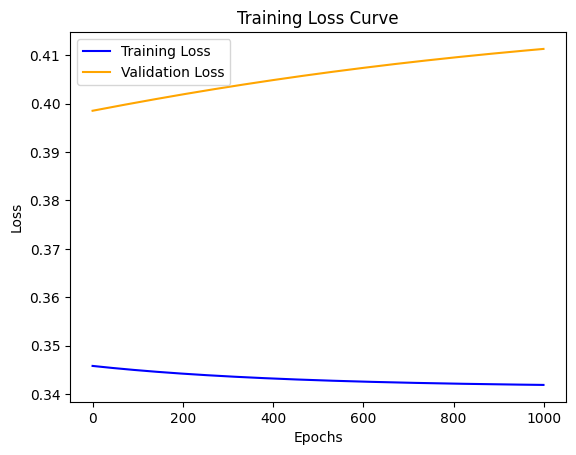

Training Loss:  0.34190816997416124
validation Loss:  0.41129642674137146


In [26]:
import matplotlib.pyplot as plt

plt.plot(loss_vector, label='Training Loss', color='blue')

plt.plot(val_loss_vector, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

print("Training Loss: ",loss_vector[-1])
print("validation Loss: ",val_loss_vector[-1])